<a href="https://colab.research.google.com/github/sadededeoglu/analyzes/blob/main/spotf%C4%B1y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from plotly.subplots import make_subplots
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings("ignore", category=UserWarning)
now = datetime.now()
year = now.year
format_date='%d.%m.%Y %H:%M:%S'
dtime = now.strftime(format_date)

In [2]:
data = pd.read_csv('spotify.csv', on_bad_lines='skip')

In [3]:
data.rename(columns=lambda x: x.strip(), inplace=True)
data.drop_duplicates(inplace=True)
data.sort_values('popularity', ascending=False, inplace=True)
data.reset_index(inplace=True)

In [7]:
data['year'] = pd.to_datetime(data['year'], format='%Y')
data['year'] = data['year'].dt.year

In [ ]:
data["duration"] = data["duration_ms"].apply(lambda x: round(x / 1000))
data.drop("duration_ms", inplace=True, axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1941 non-null   int64  
 1   artist            1941 non-null   object 
 2   song              1941 non-null   object 
 3   duration_ms       1941 non-null   int64  
 4   explicit          1941 non-null   bool   
 5   year              1941 non-null   int32  
 6   popularity        1941 non-null   int64  
 7   danceability      1941 non-null   float64
 8   energy            1941 non-null   float64
 9   key               1941 non-null   int64  
 10  loudness          1941 non-null   float64
 11  mode              1941 non-null   int64  
 12  speechiness       1941 non-null   float64
 13  acousticness      1941 non-null   float64
 14  instrumentalness  1941 non-null   float64
 15  liveness          1941 non-null   float64
 16  valence           1941 non-null   float64


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1941.0,999.275631,579.333737,0.000000,500.0000,1001.0000,1500.000000,1999.000
duration_ms,1941.0,228594.973725,39249.796103,113000.000000,203506.0000,223186.0000,247946.000000,484146.000
year,1941.0,2009.520350,5.875532,1998.000000,2004.0000,2010.0000,2015.000000,2020.000
popularity,1941.0,59.633179,21.501053,0.000000,56.0000,65.0000,73.000000,89.000
danceability,1941.0,0.667814,0.140608,0.129000,0.5810,0.6760,0.765000,0.975
energy,1941.0,0.721549,0.152872,0.054900,0.6240,0.7390,0.840000,0.999
key,1941.0,5.369397,3.615270,0.000000,2.0000,6.0000,8.000000,11.000
loudness,1941.0,-5.514082,1.938950,-20.514000,-6.4900,-5.2850,-4.168000,-0.276
mode,1941.0,0.553323,0.497277,0.000000,0.0000,1.0000,1.000000,1.000
speechiness,1941.0,0.103783,0.096148,0.023200,0.0397,0.0610,0.129000,0.576


In [9]:
popular=data[data['popularity']>=85].sort_values('popularity', ascending=False)
popular.head(5)

,index,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1,1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
2,201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
3,1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
4,1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"


In [20]:
korelasyon = data.select_dtypes(include='number').corr(method="pearson")
korelasyon

,index,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
index,1.000000,-0.311965,0.949307,0.031682,0.029024,-0.127778,0.005287,0.014254,0.012140,0.005137,0.061896,-0.077578,-0.035613,-0.216386,0.068018,-0.312002
duration_ms,-0.311965,1.000000,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762,0.999973
year,0.949307,-0.318835,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798,-0.318810
popularity,0.031682,0.048140,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057,0.048325
danceability,0.029024,-0.060083,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074,-0.060375
energy,-0.127778,-0.082982,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305,-0.083105
key,0.005287,-0.001353,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852,-0.001317
loudness,0.014254,-0.086226,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655,-0.086216
mode,0.012140,-0.004095,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445,-0.004227
speechiness,0.005137,0.062538,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192,0.062697


In [ ]:
korelasyon_vısual=px.imshow(korelasyon,text_auto=True, height=1000,width=1000,
              color_continuous_scale=px.colors.sequential.Peach,
              aspect='auto',template='plotly_dark',title='Sutunlar Arasi Korelasyon')
korelasyon_vısual.update_layout(title_x=0.5)
korelasyon_vısual.show()

In [ ]:
ses_enerji_korelasyon = px.scatter(data, x='energy', y='loudness', trendline='ols', template='plotly_dark',title='Ses Yüksekliği ve Enerji Korelasyonu')
ses_enerji_korelasyon.show()

In [ ]:
popukerlık_akustık = px.scatter(data, x='acousticness', y='popularity', trendline='ols',template='plotly_dark', title='Popülerlik ve Akustiklik Korelasyonu')
popukerlık_akustık.show()

In [ ]:
duration_year = px.bar(data, x='year', y='duration', title="Year vs Duration")
duration_year.update_layout(xaxis_title='Years', yaxis_title='Duration',template='plotly_dark', xaxis={'categoryorder':'category ascending'})
duration_year.update_xaxes(tickangle=90)
duration_year.show()

In [ ]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo'))

In [ ]:
fig.add_trace(go.Histogram(x=data['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=data['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=data['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=data['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=data['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=data['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=data['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=data['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=data['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution',template='plotly_dark',title_x=0.5)

In [ ]:
fig=px.area(data.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',
            y='song',markers=True,labels={'song':'Total songs'},template='plotly_dark',
            color_discrete_sequence=['pink'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

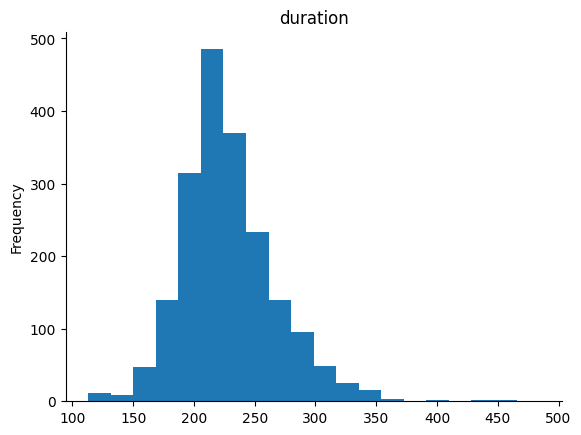

In [ ]:
data['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
genre=px.histogram(data.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',
                   y='song',
                   color_discrete_sequence=['green'],
                   template='plotly_dark',
                   marginal='box',title='<b>Total songs based on genres</b>')
genre.show()

In [ ]:
px.bar(data.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),
       x='artist',
       y='song',
       labels={'song':'Total Songs'},
       width=1000,
       color_discrete_sequence=['green'],template='plotly_dark',
       text='song',title='<b> List of Songs Recorded by Each Singer')

In [ ]:
px.bar(data.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),
       x='artist',
       y='popularity',
       color_discrete_sequence=['lightgreen'],
       template='plotly_dark',
       text='popularity',title='<b>Top 30 Popular Singers')

In [ ]:
popular_artist=px.line(data.sort_values(by='popularity',ascending=False).head(25),
                       x='song',
                       y='popularity',
                       hover_data=['artist'],
                       color_discrete_sequence=['green'],template='plotly_dark',
                       markers=True,title='<b> Top 25 songs in Spotify')
popular_artist

In [13]:
singer=px.treemap(data,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',template='plotly_dark',title='<b>TreeMap of Singers Playlist')
singer.update_traces(root_color='lightgreen')
singer

In [ ]:
explicit=px.pie(data.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',
                values='song',
                labels={'song':'Total songs'},
                hole=.6,
                color_discrete_sequence=['green','crimson'],
                template='plotly_dark',title='<b>Mustehcen icerikliler')
explicit

In [ ]:
song=px.area(data[data['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),
            x='year',
            y='song',
            labels={'song':'Total songs'},
            markers=True,
            color_discrete_sequence=['red'],
            template='plotly_dark',title='<b>Mustehcen icerikliler')
song.update_layout(hovermode='x')

In [ ]:
px.box(data,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>müstehcen içeriğe dayalı popülerlik')

In [15]:
px.scatter(data,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Sarkıda konusma sıklıgı vs Populerlık')

In [18]:
px.scatter(data,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='enerjı vs Dans oranı')

CONCLUSION
From the Analysis, we can conclude that the most popular genre in the music market is pop. According to the musicians, pop music is inherently popular because it creates a sense of familiarity for listeners. Therefore, when they hear the same 'woop' throughout the genre, they're more inclined to ease into a piece of music they've never heard because it sounds familiar. Almost 28% of Songs contains Explicit Content and on coming to popularity, explicit content songs Has high median popularity. The top 3 singers who recorded maximum songs in their album are Rihanna, Drake and Eminem. Top 3 popular Singers in Spotify are
Rihanna , Eminem and Drake . Top 3 popular songs to check out are

1. Sweather Weather by The Neighbourhood
2. Another Love by Tom Odell
3. Without Me by Eminem.